In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from ann_visualizer.visualize import ann_viz;


RANDOM_SEED = 42

2023-07-27 21:31:54.065039: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-07-27 21:31:54.066244: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-27 21:31:54.096375: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-27 21:31:54.097127: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-27 21:31:54.643158: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not fin

ModuleNotFoundError: No module named 'ann_visualizer'

# Specify each path

In [2]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [3]:
NUM_CLASSES = 9

# Dataset reading

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

NameError: name 'RANDOM_SEED' is not defined

# Model building

In [83]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [84]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_8 (Dropout)         (None, 42)                0         
                                                                 
 dense_12 (Dense)            (None, 20)                860       
                                                                 
 dropout_9 (Dropout)         (None, 20)                0         
                                                                 
 dense_13 (Dense)            (None, 10)                210       
                                                                 
 dense_14 (Dense)            (None, 9)                 99        
                                                                 
Total params: 1169 (4.57 KB)
Trainable params: 1169 (4.57 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [85]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [86]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [87]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
 1/37 [..............................] - ETA: 8s - loss: 2.3059 - accuracy: 0.0312
Epoch 1: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
37/37 [==============================] - 0s 3ms/step - loss: 2.1973 - accuracy: 0.1467 - val_loss: 2.0799 - val_accuracy: 0.3186
Epoch 2/1000
 1/37 [..............................] - ETA: 0s - loss: 2.1011 - accuracy: 0.2188
Epoch 2: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
37/37 [==============================] - 0s 1ms/step - loss: 2.0279 - accuracy: 0.2795 - val_loss: 1.8907 - val_accuracy: 0.3742
Epoch 3/1000
 1/37 [..............................] - ETA: 0s - loss: 1.9751 - accuracy: 0.2656
Epoch 3: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
37/37 [==============================] - 0s 1ms/step - loss: 1.8643 - accuracy: 0.3282 - val_loss: 1.6856 - val_accuracy: 0.4713
Epoch 4/1000
 1/37 [..............................] - ETA: 0s - loss: 1.8176 - accuracy: 0.3750
E

/Users/vamsi/Documents/GitHub/NUS-GAIP-v3/env/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 6: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
37/37 [==============================] - 0s 2ms/step - loss: 1.5716 - accuracy: 0.4193 - val_loss: 1.3655 - val_accuracy: 0.6022
Epoch 7/1000
 1/37 [..............................] - ETA: 0s - loss: 1.4984 - accuracy: 0.4766
Epoch 7: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
37/37 [==============================] - 0s 1ms/step - loss: 1.5286 - accuracy: 0.4364 - val_loss: 1.2976 - val_accuracy: 0.6367
Epoch 8/1000
 1/37 [..............................] - ETA: 0s - loss: 1.5389 - accuracy: 0.4297
Epoch 8: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
37/37 [==============================] - 0s 1ms/step - loss: 1.4761 - accuracy: 0.4500 - val_loss: 1.2382 - val_accuracy: 0.6731
Epoch 9/1000
 1/37 [..............................] - ETA: 0s - loss: 1.3981 - accuracy: 0.4219
Epoch 9: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
37/37 [=============

In [88]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

13/13 [==============================] - 0s 606us/step - loss: 0.3120 - accuracy: 0.9483


In [89]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [90]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 28ms/step
[2.8353915e-04 8.9686632e-01 1.0001259e-04 3.3397285e-10 1.4551461e-05
 5.8388417e-07 4.0425105e-15 1.0273502e-01 1.9374190e-10]
1


# Confusion matrix

49/49 [==============================] - 0s 331us/step


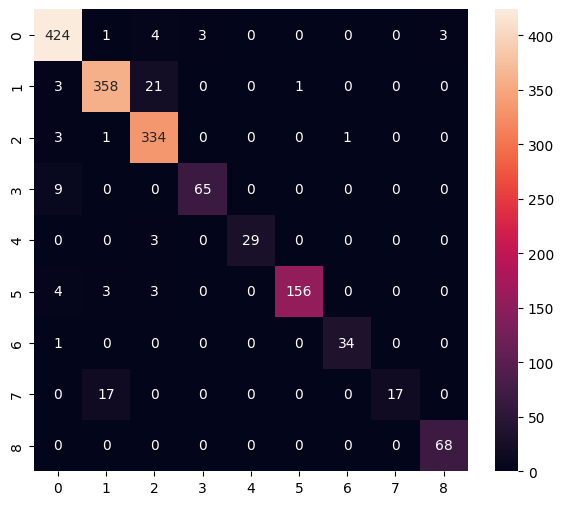

Classification Report
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       435
           1       0.94      0.93      0.94       383
           2       0.92      0.99      0.95       339
           3       0.96      0.88      0.92        74
           4       1.00      0.91      0.95        32
           5       0.99      0.94      0.97       166
           6       0.97      0.97      0.97        35
           7       1.00      0.50      0.67        34
           8       0.96      1.00      0.98        68

    accuracy                           0.95      1566
   macro avg       0.97      0.90      0.92      1566
weighted avg       0.95      0.95      0.95      1566



In [91]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [92]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

/Users/vamsi/Documents/GitHub/NUS-GAIP-v3/env/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [93]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: /var/folders/xt/ncfs5rvj6cq_5l03rdjg1sk80000gn/T/tmpex0eijgr/assets


INFO:tensorflow:Assets written to: /var/folders/xt/ncfs5rvj6cq_5l03rdjg1sk80000gn/T/tmpex0eijgr/assets
2023-07-14 15:41:33.859277: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:364] Ignored output_format.
2023-07-14 15:41:33.859588: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:367] Ignored drop_control_dependency.
2023-07-14 15:41:33.860150: I tensorflow/cc/saved_model/reader.cc:45] Reading SavedModel from: /var/folders/xt/ncfs5rvj6cq_5l03rdjg1sk80000gn/T/tmpex0eijgr
2023-07-14 15:41:33.860776: I tensorflow/cc/saved_model/reader.cc:91] Reading meta graph with tags { serve }
2023-07-14 15:41:33.860781: I tensorflow/cc/saved_model/reader.cc:132] Reading SavedModel debug info (if present) from: /var/folders/xt/ncfs5rvj6cq_5l03rdjg1sk80000gn/T/tmpex0eijgr
2023-07-14 15:41:33.864384: I tensorflow/cc/saved_model/loader.cc:231] Restoring SavedModel bundle.
2023-07-14 15:41:33.896927: I tensorflow/cc/saved_model/loader.cc:215] Running initialization

6828

# Inference test

In [94]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [95]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [96]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [97]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: user 298 µs, sys: 848 µs, total: 1.15 ms
Wall time: 687 µs


In [98]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[2.8353915e-04 8.9686632e-01 1.0001269e-04 3.3397413e-10 1.4551490e-05
 5.8388480e-07 4.0425266e-15 1.0273507e-01 1.9374266e-10]
1
